In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
df=pd.read_csv("Dataset.csv")

In [4]:
df

,Develoer,Age,Salary,Married
0,Karachi,42.0,78000.0,No
1,Lahore,32.0,48000.0,Yes
2,Karachi,36.0,60000.0,No
3,Multan,41.0,68000.0,No
4,Lahore,42.0,NaN,Yes
5,Multan,43.0,59000.0,Yes
6,Karachi,NaN,59000.0,No
7,Lahore,44.0,79000.0,Yes
8,Multan,52.0,99000.0,No
9,Lahore,32.0,69000.0,Yes


In [13]:
df.shape

(10, 4)

In [14]:
df.head()

,Develoer,Age,Salary,Married
0,Karachi,42.0,78000.0,No
1,Lahore,32.0,48000.0,Yes
2,Karachi,36.0,60000.0,No
3,Multan,41.0,68000.0,No
4,Lahore,42.0,NaN,Yes


In [15]:
df.tail()

,Develoer,Age,Salary,Married
5,Multan,43.0,59000.0,Yes
6,Karachi,NaN,59000.0,No
7,Lahore,44.0,79000.0,Yes
8,Multan,52.0,99000.0,No
9,Lahore,32.0,69000.0,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Develoer  10 non-null     object 
 1   Age       9 non-null      float64
 2   Salary    9 non-null      float64
 3   Married   10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [17]:
df.isnull()

,Develoer,Age,Salary,Married
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [18]:
df.isnull().sum()

Develoer    0
Age         1
Salary      1
Married     0
dtype: int64

<AxesSubplot:>

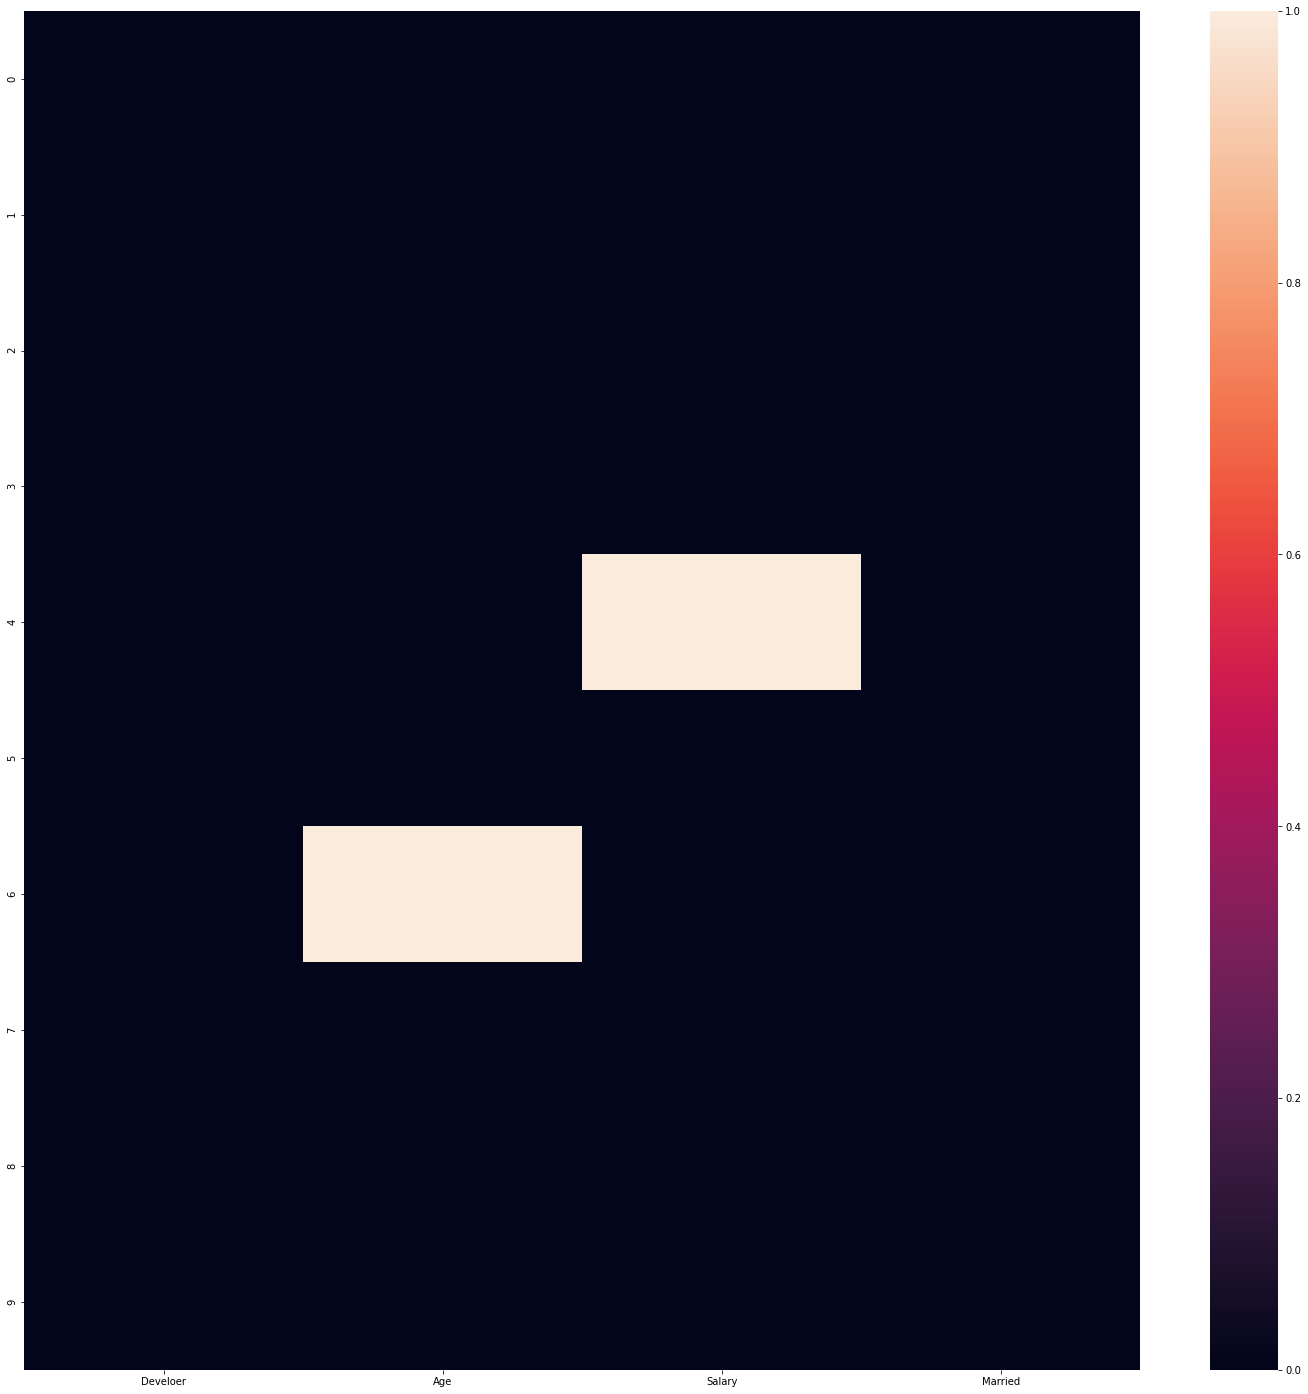

In [20]:
plt.figure(figsize=(25,25))
sb.heatmap(df.isnull())

In [21]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [22]:
print(x)
print(y)

[['Karachi' 42.0 78000.0]
 ['Lahore' 32.0 48000.0]
 ['Karachi' 36.0 60000.0]
 ['Multan' 41.0 68000.0]
 ['Lahore' 42.0 nan]
 ['Multan' 43.0 59000.0]
 ['Karachi' nan 59000.0]
 ['Lahore' 44.0 79000.0]
 ['Multan' 52.0 99000.0]
 ['Lahore' 32.0 69000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [23]:
#taking care of missing data..

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])
print(x)

[['Karachi' 42.0 78000.0]
 ['Lahore' 32.0 48000.0]
 ['Karachi' 36.0 60000.0]
 ['Multan' 41.0 68000.0]
 ['Lahore' 42.0 68000.0]
 ['Multan' 43.0 59000.0]
 ['Karachi' 42.0 59000.0]
 ['Lahore' 44.0 79000.0]
 ['Multan' 52.0 99000.0]
 ['Lahore' 32.0 69000.0]]


In [24]:
#taking care of missing data..

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])
print(x)

[['Karachi' 42.0 78000.0]
 ['Lahore' 32.0 48000.0]
 ['Karachi' 36.0 60000.0]
 ['Multan' 41.0 68000.0]
 ['Lahore' 42.0 68000.0]
 ['Multan' 43.0 59000.0]
 ['Karachi' 42.0 59000.0]
 ['Lahore' 44.0 79000.0]
 ['Multan' 52.0 99000.0]
 ['Lahore' 32.0 69000.0]]


In [26]:
#encoding the independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 42.0 78000.0]
 [0.0 1.0 0.0 32.0 48000.0]
 [1.0 0.0 0.0 36.0 60000.0]
 [0.0 0.0 1.0 41.0 68000.0]
 [0.0 1.0 0.0 42.0 68000.0]
 [0.0 0.0 1.0 43.0 59000.0]
 [1.0 0.0 0.0 42.0 59000.0]
 [0.0 1.0 0.0 44.0 79000.0]
 [0.0 0.0 1.0 52.0 99000.0]
 [0.0 1.0 0.0 32.0 69000.0]]


In [27]:
#encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [28]:
#spliting the dataset into the training set and test set
print('split')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2 , random_state=1)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

split
[[1.0 0.0 0.0 42.0 59000.0]
 [0.0 1.0 0.0 42.0 68000.0]
 [1.0 0.0 0.0 42.0 78000.0]
 [0.0 0.0 1.0 41.0 68000.0]
 [0.0 1.0 0.0 32.0 48000.0]
 [0.0 1.0 0.0 44.0 79000.0]
 [0.0 0.0 1.0 52.0 99000.0]
 [0.0 0.0 1.0 43.0 59000.0]]
[[1.0 0.0 0.0 36.0 60000.0]
 [0.0 1.0 0.0 32.0 69000.0]]
[0 1 0 0 1 1 0 1]
[0 1]
